https://github.com/liwatts/ICPE_637

## Problem 1

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import seaborn as sns

data = pd.read_csv("solar.csv")

x_red = data['east red']
x_green = data['east green']
x_blue = data['west blue']

In [80]:
data

,east red,east green,west blue
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0
...,...,...,...
2011,0.0,0.0,0.0
2012,0.0,0.0,0.0
2013,0.0,0.0,0.0
2014,0.0,0.0,0.0


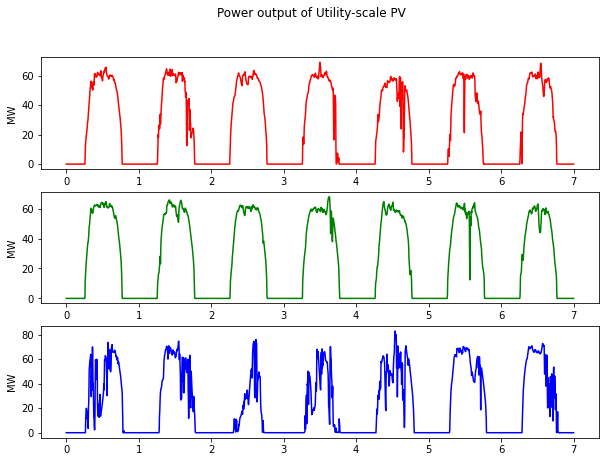

In [35]:
N = data.shape[0]

hours = np.linspace(0, N / 12, N)

days = hours / 24

fig, axs = plt.subplots(3, figsize=(10,7))
fig.suptitle('Power output of Utility-scale PV')
axs[0].plot(days, data['east red'], color = 'red')
axs[1].plot(days, data['east green'], color = 'green')
axs[2].plot(days, data['west blue'], color = 'blue')

for ax in axs.flat:
    ax.set(ylabel = 'MW')


### Reasons why the blue signal looks different from the other two

 - the blue signal is much further geographically separated from the other 2 signals
 - Different weather patterns occur in different regions of Texas and the blue region may have more adverse weather conditions for PV
 - These solar farms may be set up differently and the blue one may not be at an optimal angle or could be fixed, whereas the others may be on a 1 or 2 axis system allowing more solar collection
 - from the fluctuation of the blue signal, it is likely that cloud cover affects panels in the western panhandle of texas rather than the eastern side

In [55]:
data.corr()

,east red,east green,west blue
east red,1.000000,0.977611,0.849663
east green,0.977611,1.000000,0.846091
west blue,0.849663,0.846091,1.000000


<AxesSubplot:>

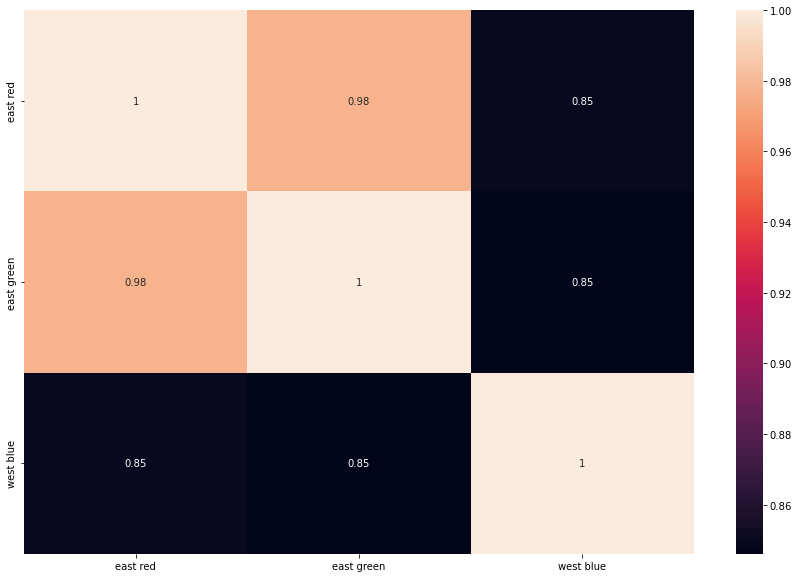

In [58]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot = True)

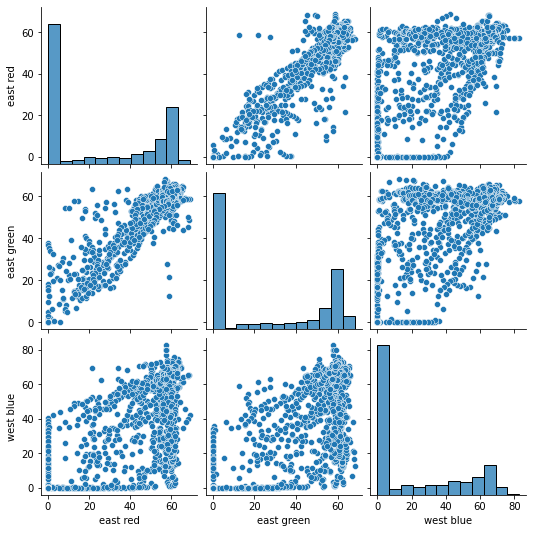

In [59]:
sns.pairplot(data)

In [72]:
np.corrcoef(x_red, x_blue)[0,1]



0.8496625466901581

### Conclusions from cross-correlation

 - Despite the spread of the points between west blue and east green or east red, the correlation coefficient between these pairs is still high at ~85%
 - As expected from visually seeing the graphs, the east green and east red datasets match very well with a correlation coeffecient of 98%. This would make comparing cloud cover and data sharing between these two sites more beneficial for forecasting compared to doing something similar between either of these sites and the west blue site.

# Problem 2

### 2.1

* Dimension of matrix ***X***: [240 x (5 * 60 * 60)] since there are 60 data samples per second and 60 seconds per minute over a range of 5 minutes of collected data

* dimension ***X*** [240x18000]

### 2.2

* do you expect covariance of ***X*** to be a diagonal matrix?

* I expect the covariance matrix of ***X*** to not be a diagonal matrix since covariance of ***X*** shows relationship between values in a non-diagonal format, and only through PCA/SVD can you get the covariance matrix into diagonal format through matrix ***Y*** from the equation Y = P * X

### 2.3

* After performing a PCA and obtaining the transformed matrix ***Y***, the covariance of ***Y*** will be a diagonal matrix. This format shows how much of the variance is captured in each dimension, so as such a majority of the dataset should be able to be captured in the first dimension, and it can be rendered more accurate by using the first 2 or 3 dimensions.